# Adult Income Dataset
The goal of this program is to build a classifier that can classify income groups based on 14 other features, such as age, gender, and occupation. We also want to find the features that have the most impact with income (age and occupation most notably).

First, we have to import the required packages and the dataset itself.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Before we get to classifying, let's poke around the dataset to find any nuances that might important to consider when training our data.

First, let's see if the number of hours a person works has any drastic effect on our income class.

40.619707467282524
occupation
?                    31.585366
Adm-clerical         38.489051
Armed-Forces         40.000000
Craft-repair         43.326667
Exec-managerial      44.563536
Farming-fishing      46.540541
Handlers-cleaners    36.083333
Machine-op-inspct    40.526316
Other-service        35.561538
Priv-house-serv      32.875000
Prof-specialty       42.743750
Protective-serv      43.625000
Sales                39.954198
Tech-support         40.829268
Transport-moving     46.451613
Name: hours-per-week, dtype: float64


[Text(0, 0.5, 'Average Hours Per Week'),
 Text(0.5, 0, 'Occupation'),
 Text(0.5, 1.0, 'Occupation vs. Average Hours Per Week')]

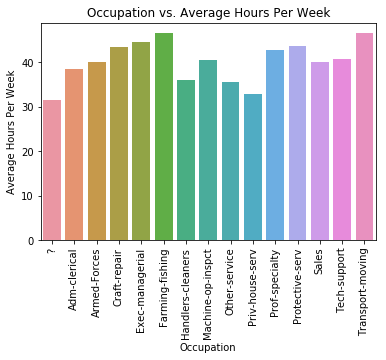

In [47]:
print(df['hours-per-week'].mean())

occ_by_hours = df.groupby('occupation').mean()
print(occ_by_hours['hours-per-week'])
occ_by_hours.reset_index(inplace=True)

graph = sns.barplot(x='occupation', y='hours-per-week', data=occ_by_hours)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set(xlabel='Occupation', ylabel='Average Hours Per Week', title='Occupation vs. Average Hours Per Week')

We can can see that most (known) occupational averages line up with the average of approximately 40.6 hours. One noteable exception is `Priv-house-serv` and `?`, the latter of which remains unnamed.

Intuition indicates that higher education leads to higher income. Let's test this theory by following a procedure similar to the one we just performed on occupation.

education     income
10th          <=50K      45
              >50K        4
11th          <=50K      56
              >50K        1
12th          <=50K      13
1st-4th       <=50K       6
              >50K        1
5th-6th       <=50K      13
              >50K        1
7th-8th       <=50K      30
              >50K        1
9th           <=50K      16
              >50K        4
Assoc-acdm    <=50K      20
              >50K       10
Assoc-voc     <=50K      36
              >50K       12
Bachelors     <=50K     136
              >50K       84
Doctorate     <=50K       6
              >50K       10
HS-grad       <=50K     332
              >50K       81
Masters       <=50K      32
              >50K       39
Preschool     <=50K       4
Prof-school   <=50K       6
              >50K       21
Some-college  <=50K     225
              >50K       54
Name: age, dtype: int64


[Text(0, 0.5, 'Income Class'),
 Text(0.5, 0, 'Education'),
 Text(0.5, 1.0, 'Education vs. Income Class')]

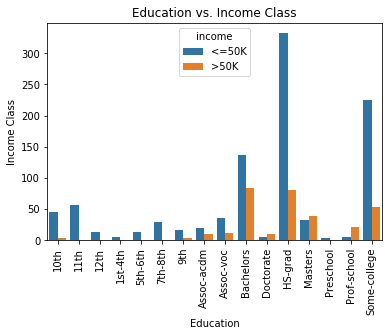

In [64]:
income_by_education = df.groupby(['education', 'income']).count()
print(income_by_education['age'])
income_by_education.reset_index(inplace=True)

graph = sns.barplot(x='education', y='age', hue='income', data=income_by_education)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set(xlabel='Education', ylabel='Income Class', title='Education vs. Income Class')

Based on the graph, we can infer that 
* Most people in the survey either graduated high school
* Most people make less than 50K
* You have greater chance of making more than 50K with higher education